# 格子ネットワークとWatts-Strogatzモデル
格子ネットワークを生成して，基本的なネットワーク指標を計算します。

networkxの読み込み

In [1]:
import networkx as nx

その他のライブラリ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.sparse.csgraph as csgraph

平均最短経路長を計算する関数（networkxのは遅いので）

In [3]:
def compute_distances(g, unweighted=False):
  adj_matrix = nx.adjacency_matrix(g).toarray()
  distances = csgraph.shortest_path(adj_matrix, directed=g.is_directed(), unweighted=unweighted)
  d_ave = np.mean(distances[np.isfinite(distances) & (distances > 0)])
  return d_ave, distances

## 格子ネットワーク
格子ネットワークの生成と描画

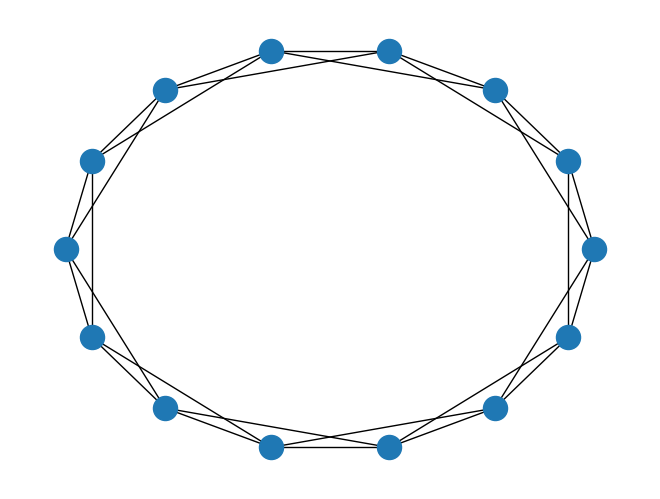

In [4]:
# Watts-Strogatzモデルを利用して作成
# n: ノード数
# k: 格子ネットワークにおける隣接ノードの数
# p: エッジの張り替え確率)
g = nx.watts_strogatz_graph(n=14, k=4, p=0)

# 円形レイアウトで描画
nx.draw(g, nx.circular_layout(g))

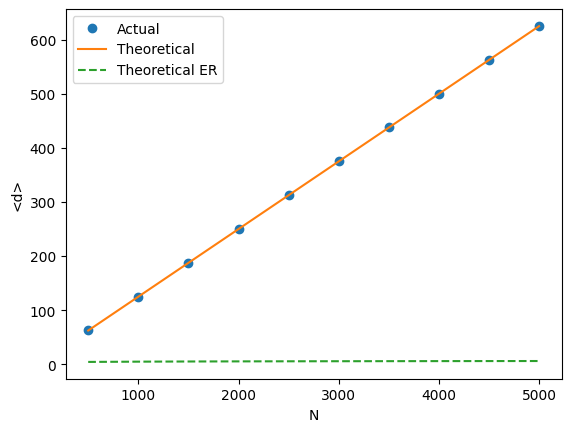

In [5]:
# 調査対象のノード数の配列を作成
N_seq = np.arange(500, 5001, 500)
d_ave = []

# 各ノード数で平均最短経路長を計算
for N in N_seq:
    g = nx.watts_strogatz_graph(n=N, k=4, p=0)
    d_ave_ind, _ = compute_distances(g)
    d_ave.append(d_ave_ind)

# 実測値のプロット
plt.plot(N_seq, d_ave, 'o', label='Actual')

# 理論値のプロット (N/8)
theoretical = N_seq / 8
plt.plot(N_seq, theoretical, '-', label='Theoretical')

# Erdős-Rényi ランダムネットワークの理論値 (log(N)/log(4))
theoretical_er = np.log(N_seq) / np.log(4)
plt.plot(N_seq, theoretical_er, '--', label='Theoretical ER')

plt.xlabel('N')
plt.ylabel('<d>')
plt.legend()

## Watts-Strogatzモデル
Watts-Strogatzモデルネットワークの描画

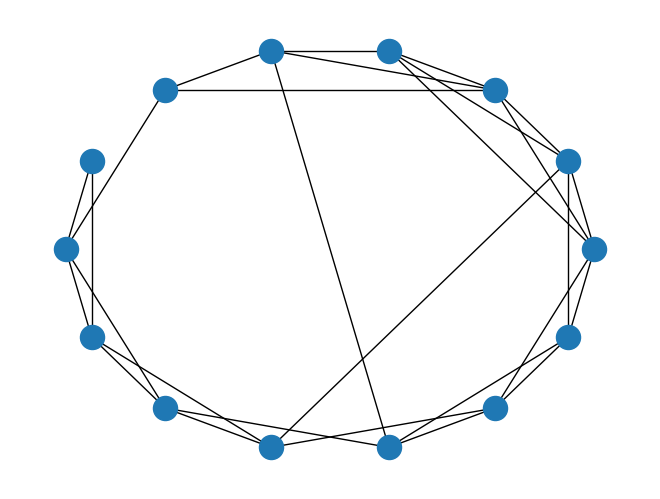

In [6]:
# Watts-Strogatzモデルを利用して作成
# n: ノード数
# k: 格子ネットワークにおける隣接ノードの数
# p: エッジの張り替え確率)
g = nx.watts_strogatz_graph(n=14, k=4, p=0.1)

# 円形レイアウトで描画
nx.draw(g, nx.circular_layout(g))

## スモールワールドの検証（図3.9の再現）

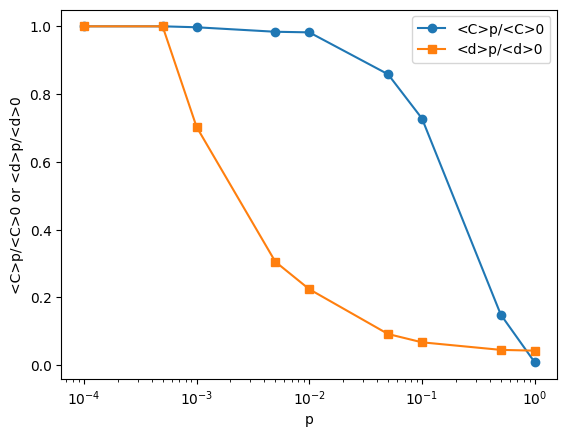

In [7]:
# パラメータ設定
N = 1000  # ノード数
k = 4     # 次数
p_set = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

np.random.seed(3)  # シード設定
data = []
for p in p_set:
    # Watts-Strogatzモデルネットワークの作成
    g = nx.watts_strogatz_graph(n=N, k=k, p=p)

    # 平均クラスタ係数
    c_ave = nx.average_clustering(g)

    # 平均最短経路長
    d_ave, _ = compute_distances(g)

    if p == 0:
        c_ave_base = c_ave
        d_ave_base = d_ave
    else:
        data.append([p, c_ave/c_ave_base, d_ave/d_ave_base])

data = np.array(data)

# プロット

# p vs <C>_p / <C>_0
plt.plot(data[:,0], data[:,1], 'o-', label='<C>p/<C>0')

# p vs <d>_p / <d>_0
plt.plot(data[:,0], data[:,2], 's-', label='<d>p/<d>0')

# グラフの設定
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('<C>p/<C>0 or <d>p/<d>0')
plt.legend()

## やってみよう
* 平均次数やノード数を変えて，ネットワークを描画してみよう。
* 平均次数やノード数を変えて，スモールワールド性を検証してみよう。